In [1]:
#Description: Determine the worse and best days for the  S&P500

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [3]:
#Create lists to store the daily simple return for each day
Mon=[]
Tues=[]
Wed=[]
Thur=[]
Fri=[]
Sat=[]
Sun=[]

#Create a function to get the daily simple return for each day and append it to the  corresponding day
def get_dsr(day,dsr):
    if day=='Monday':
        Mon.append(float(dsr))
    elif day =='Tuesday':
        Tues.append(float(dsr))
    elif day =='Tuesday':
        Tues.append(float(dsr))
    elif day =='Wednesday':
        Wed.append(float(dsr))
    elif day =='Thursday':
        Thur.append(float(dsr))
    elif day =='Friday':
        Fri.append(float(dsr))
    elif day =='Satureday':
        Sat.append(float(dsr))
    elif day =='Sunday':
        Sun.append(float(dsr))
    else:
        print('Something is wronf with the input for the day')

In [4]:
df=yf.download('^GSPC',start='1980-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10884 entries, 1979-12-31 to 2023-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10884 non-null  float64
 1   High       10884 non-null  float64
 2   Low        10884 non-null  float64
 3   Close      10884 non-null  float64
 4   Adj Close  10884 non-null  float64
 5   Volume     10884 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 595.2 KB


In [6]:
#Calculate and show the daily simple return
DSR=df['Close'].pct_change(1)#compute the dsr
df['DSR']=DSR
#Remove the row of the data from the data set
df=df[1:]
#show the current data set
df

,Open,High,Low,Close,Adj Close,Volume,DSR
Date,,,,,,,
1980-01-02,0.000000,108.430000,105.290001,105.760002,105.760002,40610000,-0.020196
1980-01-03,0.000000,106.080002,103.260002,105.220001,105.220001,50480000,-0.005106
1980-01-04,0.000000,107.080002,105.089996,106.519997,106.519997,39130000,0.012355
1980-01-07,0.000000,107.800003,105.800003,106.809998,106.809998,44500000,0.002723
1980-01-08,0.000000,109.290001,106.290001,108.949997,108.949997,53390000,0.020036
...,...,...,...,...,...,...,...
2023-02-23,4018.600098,4028.300049,3969.189941,4012.320068,4012.320068,3952940000,0.005329
2023-02-24,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3877700000,-0.010538
2023-02-27,3992.360107,4018.050049,3973.550049,3982.239990,3982.239990,3836950000,0.003073


In [7]:
#Create a loop gather the daily simple returns of each day from the data set
for i in range(0,len(df)):
    df_date=str(df.index[i])#get the current date and casting it as a string
    df_dsr=df['DSR'][i]#Get the current daily simple return
    df_month=df_date.split('-')[1]#get the current month
    curr_date=df.index[i]#get the current date
    df_weekday=calendar.day_name[curr_date.weekday()]#get the weekday
    
    #Add the daily simple return to corresponding list for the day
    get_dsr(df_weekday,df_dsr)

In [8]:
calendar.day_name[df.index[-1].weekday()]

'Wednesday'

In [9]:
df.index[-1]

Timestamp('2023-03-01 00:00:00')

In [10]:
#Create a fundction to average the returns of each weekday
def AVG(day):
    if not day:#if this is true then the list is empty so return a list containing 0
        return[0]
    else:
        return[sum(day)/len(day)]

In [11]:
#Create a new dataframe and set the index to be the days of the week
df_returns=pd.DataFrame(index=['Monday','Tuesday','wednesday','Thursday','Friday','Satureday','Sunday'])
#Get the average for each weekday and the values under the column called AVG
df_returns['AVG']=AVG(Mon)+AVG(Tues)+AVG(Wed)+AVG(Thur)+AVG(Fri)+AVG(Sat)+AVG(Sun)

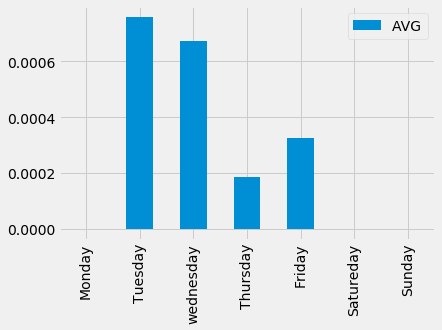

In [12]:
df_returns.plot.bar()

In [13]:
#Show The returns
df_returns

,AVG
Monday,-2.053361e-07
Tuesday,7.584795e-04
wednesday,6.736384e-04
Thursday,1.850342e-04
Friday,3.249568e-04
Satureday,0.000000e+00
Sunday,0.000000e+00
